#**Trabajo Práctico N°1: Reservas de Hotel**
Organización de Datos (7506): cátedra Rodriguez

Grupo 25:
- Mariana Juarez Goldemberg - Padrón: 108441
- Lisandro Roman - Padrón: 107274
- Miranda Marenzi - Padrón: 109404

Checkpoint N°4

a. Construir una red neuronal para clasificación y mejorar su performance mediante la búsqueda de arquitectura e hiperparámetros adecuados.

b. Evaluar la performance de todos los modelos en entrenamiento y validación,
explicar todas las métricas y mostrar la matriz de confusión.

c. Generar predicciones con el conjunto de test y realizar los submits
correspondientes en la competencia de Kaggle.

d. Generar las conclusiones finales del trabajo práctico evaluando la performance
de todos los modelos entrenados.

Cargamos las librerías y paquetes necesarios.

In [ ]:
!pip install keras==2.12.0
!pip uninstall tensorflow -y
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.
Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 45.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorf

In [ ]:
!pip install keras-tuner --upgrade

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras


import keras_tuner as kt

np.random.seed(1)
tf.random.set_seed(1)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 33.6 MB/s eta 0:00:00
Using TensorFlow backend


Cargamos los datasets necesarios y creamos los df de entrenamiento y test.

In [ ]:
df_check1 = pd.read_csv('/content/sample_data/df.csv')
df_test_check1 = pd.read_csv('/content/sample_data/df_test.csv')
df_id = pd.read_csv('/content/sample_data/df_test_id.csv')

In [ ]:
df_train = df_check1.copy()
df_test = df_test_check1.copy()

df_test.drop(columns = ['reservation_status_date'], inplace = True)

df_trabajo_x=df_train.drop(['is_canceled'], axis='columns', inplace=False)
df_trabajo_y = df_train['is_canceled'].copy()
x_train, x_test, y_train, y_test = train_test_split(df_trabajo_x,
                                                    df_trabajo_y,
                                                    test_size=0.3,
                                                    random_state=9)

#Redes Neuronales

Las redes neuronales están conformadas por un input, pesos, suma de los input*pesos (suma ponderada), una función de activación y un output.

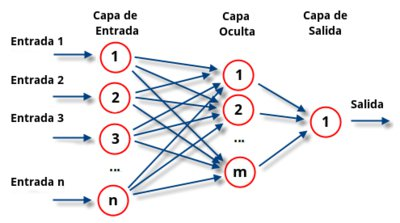

Son entrenadas mediante **backpropagation**, que busca encontrar el mínimo de la función de error moviéndose en el sentido contrario al gradiente de la misma, comenzando desde lo más atrás hacia adelante en la red.

A tener en cuenta, es que las redes neuronales son sensibles a los cambios de escala, por lo tanto debemos escalar los datos. Además, las redes complejar pueden producir overfitting. Para evitarlo se utilizan métodos de regularización y optimizadores.


##Valores Importantes

Los valores que debemos ajustar a la hora de crear nuestra red neuronal son:
- **learning_rate**: tasa de aprendizaje. Controla los pesos de la red en cada iteración del entrenamiento.
- **activation**: son las funciones matemáticas que se utilizan para determinar la salida de una neurona en una capa de la red neuronal.
- **batch_size** (tamaño del lote): cantidad de ejemplos de entrenamiento que se utilizarán en cada paso de entrenamiento.
- **epochs** (épocas): cuántas veces se recorre todo el conjunto de entrenamiento durante su entreno.
- **hidden_layers** (capas ocultas): capas intermedias entre la entrada y la salida.

Experimentaremos con distintos valores para lograr el mejor ajuste y para las épocas y batch_size los buscaremos con Random Search.

#Modelo basico

##Normalizacion de los datos

La normalización ayuda a estabilizar los cálculos numéricos en una red neuronal. Cuando los valores de entrada tienen escalas muy diferentes, los gradientes de las funciones de pérdida durante el entrenamiento pueden volverse extremadamente grandes o pequeños, lo que dificulta la convergencia.

In [ ]:
df_train.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'deposit_type_Non Refund', 'deposit_type_Refundable', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'hotel_Resort Hotel',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distributi

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,57298.0,106.106583,98.285304,0.00,23.0,76.0,167.0,395.0
arrival_date_year,57298.0,2016.137055,0.709204,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_month,57298.0,6.519390,3.104289,1.00,4.0,7.0,9.0,12.0
arrival_date_day_of_month,57298.0,15.771912,8.781648,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,57298.0,0.935984,0.995033,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,57298.0,2.522566,1.894642,0.00,1.0,2.0,3.0,40.0
adults,57298.0,1.859803,0.468324,1.00,2.0,2.0,2.0,6.0
children,57298.0,0.085204,0.355324,0.00,0.0,0.0,0.0,3.0
babies,57298.0,0.006824,0.083379,0.00,0.0,0.0,0.0,2.0
is_repeated_guest,57298.0,0.022566,0.148517,0.00,0.0,0.0,0.0,1.0


In [ ]:
valores_a_escalar = ['lead_time',
'arrival_date_year',
'arrival_date_month',
'arrival_date_day_of_month',
'stays_in_weekend_nights',
'stays_in_week_nights',
'adults',
'children',
'babies',
'previous_cancellations',
'previous_bookings_not_canceled',
'reserved_room_type',
'assigned_room_type',
'booking_changes',
'agent',
'company',
'days_in_waiting_list',
'adr' ,
'required_car_parking_spaces',
'total_of_special_requests']

In [ ]:
sScaler = StandardScaler()
sScaler.fit(pd.DataFrame(x_train[valores_a_escalar]))

StandardScaler()

In [ ]:
x_train_transform_1=sScaler.transform(pd.DataFrame(x_train[valores_a_escalar]))
x_test_transform_1=sScaler.transform(pd.DataFrame(x_test[valores_a_escalar]))
x_train_transform_1

array([[-0.93595947, -1.60455007,  1.12394837, ..., -0.01497084,
        -0.22201818,  0.6237884 ],
       [ 0.21171299, -0.19346637,  0.8008547 , ...,  0.42492175,
        -0.22201818, -0.68159119],
       [ 1.68439005, -0.19346637,  0.47776103, ..., -0.86472319,
        -0.22201818, -0.68159119],
       ...,
       [-0.35704504, -1.60455007,  1.12394837, ..., -1.29376359,
         4.46466878,  0.6237884 ],
       [-1.07814897, -1.60455007,  0.47776103, ..., -0.25901911,
        -0.22201818,  0.6237884 ],
       [ 0.48593562, -0.19346637,  1.77013571, ..., -1.29881112,
        -0.22201818,  1.92916799]])

In [ ]:
#Creamos un nuevo dataframe con los valores escalados
x_train_escalado = x_train.copy()
x_test_escalado = x_test.copy()

#Le asignamos los nuevos valores escalados y mantenemos los valores del one hot encoding
for i in range(len(valores_a_escalar)):
    x_train_escalado[valores_a_escalar[i]]=x_train_transform_1[:,i]
    x_test_escalado[valores_a_escalar[i]]=x_test_transform_1[:,i]
x_train_escalado

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,continent_America,continent_Asia,continent_Europa,continent_Oceania,estadia_completa_o_reservado
5344,-0.935959,-1.604550,1.123948,1.624572,0.068050,-0.273155,-1.850941,2.547219,-0.081917,0,...,1,0,0,0,1,0,0,1,0,3
47445,0.211713,-0.193466,0.800855,1.510743,-0.941704,-0.803415,0.294591,-0.241553,-0.081917,0,...,1,0,0,0,1,0,0,1,0,1
44368,1.684390,-0.193466,0.477761,-1.221138,-0.941704,-0.803415,0.294591,-0.241553,-0.081917,0,...,0,0,0,0,1,0,0,1,0,1
55320,0.303121,-0.193466,-1.137707,0.941601,-0.941704,0.257105,0.294591,-0.241553,-0.081917,0,...,1,0,0,0,1,0,0,1,0,3
20704,0.689063,1.217617,-0.814614,-0.651996,0.068050,-0.803415,2.440123,-0.241553,-0.081917,0,...,0,1,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42747,0.353903,1.217617,-0.491520,1.169258,1.077805,-0.273155,0.294591,-0.241553,-0.081917,0,...,1,0,0,0,1,0,0,1,0,4
22584,-0.529704,1.217617,-0.168426,-0.196682,-0.941704,-0.273155,0.294591,-0.241553,-0.081917,0,...,1,0,0,0,1,1,0,0,0,2
501,-0.357045,-1.604550,1.123948,-0.879653,-0.941704,0.257105,-1.850941,-0.241553,-0.081917,0,...,0,0,1,0,0,0,0,1,0,3
55934,-1.078149,-1.604550,0.477761,-0.879653,-0.941704,-0.803415,0.294591,-0.241553,-0.081917,0,...,0,1,0,0,1,0,0,1,0,1


Tambien para el dataframe de test


In [ ]:
df_test_transform_1=sScaler.transform(pd.DataFrame(df_test[valores_a_escalar]))

df_test_escalado = df_test.copy()

for i in range(len(valores_a_escalar)):
    df_test_escalado[valores_a_escalar[i]]=df_test_transform_1[:,i]

df_test_escalado

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,continent_America,continent_Asia,continent_Europa,continent_Oceania,estadia_completa_o_reservado
0,1.735172,-0.193466,1.447042,-0.993481,0.068050,-0.273155,0.294591,-0.241553,-0.081917,0,...,0,0,0,0,1,0,0,1,0,3
1,1.826580,-0.193466,-0.491520,-0.538167,-0.941704,0.787365,0.294591,-0.241553,-0.081917,0,...,0,0,0,0,1,0,0,1,0,4
2,-1.078149,-0.193466,0.477761,0.827773,-0.941704,-0.803415,2.440123,-0.241553,-0.081917,0,...,0,1,0,0,1,0,0,1,0,1
3,0.912504,-0.193466,1.123948,1.510743,1.077805,1.317625,0.294591,5.335990,-0.081917,0,...,0,1,0,0,1,0,0,1,0,7
4,1.278134,-0.193466,1.447042,1.169258,1.077805,-0.803415,0.294591,-0.241553,-0.081917,0,...,0,0,0,0,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26530,-0.763301,1.217617,-0.814614,0.600116,1.077805,0.257105,0.294591,-0.241553,-0.081917,0,...,1,0,0,0,1,0,0,1,0,5
26531,0.242182,-0.193466,0.800855,-1.448794,1.077805,-0.803415,0.294591,-0.241553,-0.081917,0,...,1,0,0,0,1,0,0,1,0,3
26532,-0.621111,-0.193466,0.477761,0.713945,0.068050,-0.803415,0.294591,-0.241553,-0.081917,0,...,0,1,0,0,1,0,0,1,0,2
26533,0.587500,1.217617,0.477761,-0.651996,1.077805,0.787365,0.294591,-0.241553,-0.081917,0,...,1,0,0,0,1,0,0,1,0,6


##Creación del Modelo

Para los modelos realizados, utilizaremos para las capas intermedias la activación ReLu, ya que por lo investigado, es comúnmente utilizada por su capacidad de introducir no linealidad en una red neuronal y ayuda a mitigar el problema de descenso por gradiente.
Además, utilizamos regularización para prevenir el overfitting y mejorar las predicciones. En específico usamos la regularización Dropout, donde se desactivan aleatoriamente un porcentaje de neuronas en cada capa oculta para evitar que dependan demasiado de ciertas conexiones.
En la capa de salida, usamos la activación sigmodea, ya que mapea cualquier valor de entrada a un rango entre 0 y 1, siendo útil para la clasificación binaria.

In [ ]:
cant_clases = 1 #la cantidad de variables dependientes, nuestro caso es 1 sola

d_in=len(x_train_escalado.columns)
print(cant_clases, d_in)

1 45


#### Primera arquitectura: Modelo piramidal con dos capas

In [ ]:
neu_primera_capa = d_in
neu_segunda_capa = neu_primera_capa/2

model_1 = keras.Sequential([
    keras.layers.Dense(neu_primera_capa,input_shape=(d_in,),activation ='relu'),
    keras.layers.Dense(neu_segunda_capa,activation ='relu'),
    keras.layers.Dropout(0.2), #regularizacion
    keras.layers.Dense(cant_clases, activation='sigmoid') #capa de salida con activacion sigmoidea para problemas de clasificacion binaria
])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                2070      
                                                                 
 dense_1 (Dense)             (None, 22)                1012      
                                                                 
 dropout (Dropout)           (None, 22)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 23        
                                                                 
Total params: 3,105
Trainable params: 3,105
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo, con 100 epocas y 50 batch_size.

In [ ]:
model_1.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
  loss='binary_crossentropy',
  metrics=['AUC'] # metricas para ir calculando en cada iteracion o batch
)

cant_epochs_hotel=100
historial = model_1.fit(x_train_escalado,y_train,
                      epochs=cant_epochs_hotel,
                      batch_size=50,verbose=False)

Vemos como nuestro modelo aprende según la cantidad de épocas.

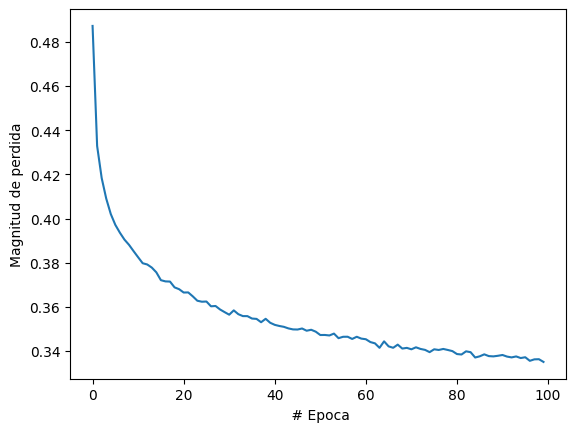

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel(" # Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [ ]:
y_pred = model_1.predict(x_test_escalado) #y_pred es un conjunto de probabilidades, a partir de esto, clasificamos las probailidades

y_predic_cat_ej1 = np.where(y_pred>0.5,1,0)

y_predic_cat_ej1

538/538 [==============================] - 1s 1ms/step


array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      8646
           1       0.84      0.79      0.82      8544

    accuracy                           0.82     17190
   macro avg       0.82      0.82      0.82     17190
weighted avg       0.82      0.82      0.82     17190



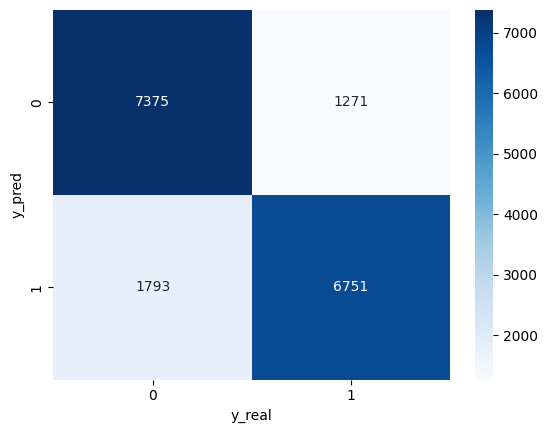

In [ ]:
ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

print(classification_report(y_test,y_predic_cat_ej1))

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues', fmt='g')
plt.show()

In [ ]:
y_pred_final = model_1.predict(df_test_escalado)

830/830 [==============================] - 1s 1ms/step


In [ ]:
y_pred_final = np.where(y_pred_final>0.5,1,0)
y_pred_final = y_pred_final.ravel()
y_pred_final

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
ds_resultados=pd.DataFrame(zip(df_id['id'],y_pred_final),columns=['id','is_canceled'])
ds_resultados.head(5)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
ds_resultados.shape

(26535, 2)

In [ ]:
ds_resultados.to_csv("prueba.csv", index = False)

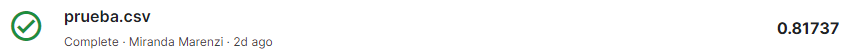

#### Segunda Arquitectura: Una capa sola con la misma cantidad de neuronas que las variables de entrada

In [ ]:
model_2 = keras.Sequential([
    keras.layers.Dense(d_in,input_shape=(d_in,),activation ='relu'),
    keras.layers.Dropout(0.2), #regularizacion
    keras.layers.Dense(cant_clases, activation='sigmoid') #capa de salida con activacion sigmoidea para problemas de clasificacion binaria
])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 45)                2070      
                                                                 
 dropout_1 (Dropout)         (None, 45)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 46        
                                                                 
Total params: 2,116
Trainable params: 2,116
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo, con 100 epocas y 50 batch_size.

In [ ]:
model_2.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
  loss='binary_crossentropy',
  metrics=['AUC'] # metricas para ir calculando en cada iteracion o batch
)

cant_epochs_hotel=100
historial = model_2.fit(x_train_escalado,y_train,
                      epochs=cant_epochs_hotel,
                      batch_size=50,verbose=False)

Vemos cómo el modelo va aprendiendo según la cantidad de épocas.

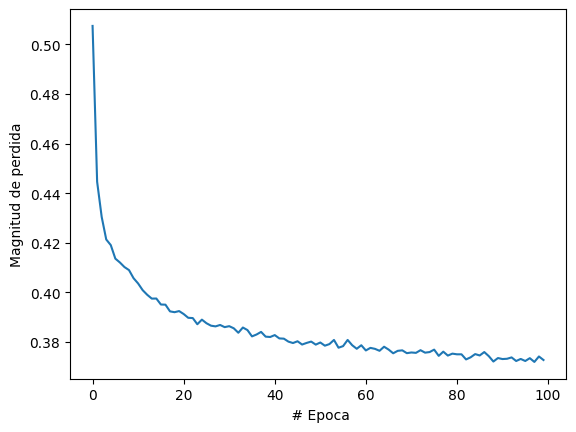

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel("#Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [ ]:
y_pred = model_2.predict(x_test_escalado) #y_pred es un conjunto de probabilidades, a partir de esto, clasificamos las probailidades

y_predic_cat_ej1 = np.where(y_pred>0.5,1,0)

y_predic_cat_ej1

538/538 [==============================] - 1s 2ms/step


array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      8646
           1       0.86      0.77      0.81      8544

    accuracy                           0.82     17190
   macro avg       0.82      0.82      0.82     17190
weighted avg       0.82      0.82      0.82     17190



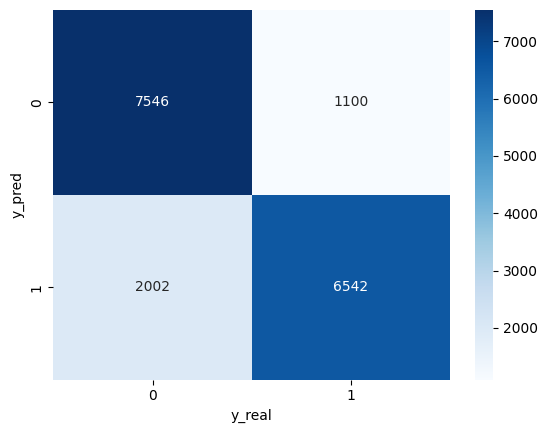

In [ ]:
ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

print(classification_report(y_test,y_predic_cat_ej1))

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues', fmt='g')
plt.show()

In [ ]:
y_pred_final = model_2.predict(df_test_escalado)

830/830 [==============================] - 2s 2ms/step


In [ ]:
y_pred_final = np.where(y_pred_final>0.5,1,0)
y_pred_final = y_pred_final.ravel()
y_pred_final

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
ds_resultados=pd.DataFrame(zip(df_id['id'],y_pred_final),columns=['id','is_canceled'])
ds_resultados.head(5)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
ds_resultados.shape

(26535, 2)

In [ ]:
ds_resultados.to_csv("red_neuronal_model2.csv", index = False)

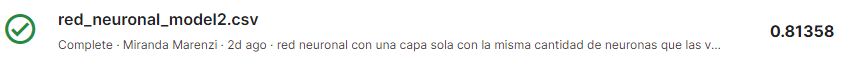

####Tercera Arquitectura: Modelo piramidal con tres capas

In [ ]:
cant_clases = 1

d_in=len(x_train_escalado.columns)
neu_segunda_capa = d_in/2
neu_tercera_capa = neu_segunda_capa/2

model_3 = keras.Sequential([
    keras.layers.Dense(d_in,input_shape=(d_in,),activation ='relu'), #capa oculta nro1 con 64 neuronas y activacion ReLu, capa de entrada
    keras.layers.Dense(neu_segunda_capa,activation ='relu'), #capa oculta nro2 con 64 neuronas y activacion ReLu, capa intermedia
    keras.layers.Dense(neu_tercera_capa,activation ='relu'), #capa oculta nro3 con 64 neuronas y activacion ReLu, capa intermedia
    keras.layers.Dropout(0.2), #regularizacion
    keras.layers.Dense(cant_clases, activation='sigmoid') #capa de salida con activacion sigmoidea para problemas de clasificacion binaria
])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 45)                2070      
                                                                 
 dense_6 (Dense)             (None, 22)                1012      
                                                                 
 dense_7 (Dense)             (None, 11)                253       
                                                                 
 dropout_2 (Dropout)         (None, 11)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 12        
                                                                 
Total params: 3,347
Trainable params: 3,347
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo, con 100 epocas y 50 batch_size

In [ ]:
model_3.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
  loss='binary_crossentropy',
  metrics=['AUC'] # metricas para ir calculando en cada iteracion o batch
)

cant_epochs_hotel=100
historial = model_3.fit(x_train_escalado,y_train,
                      epochs=cant_epochs_hotel,
                      batch_size=50,verbose=False)

Podemos notar que con 3 capas no hay tanta diferencia en los tiempos de ejecucion

Vemos cómo el modelo va aprendiendo según la cantidad de épocas.

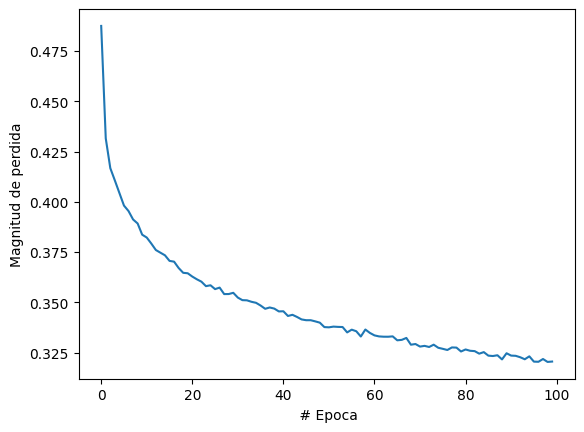

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel(" # Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [ ]:
y_pred = model_3.predict(x_test_escalado) #y_pred es un conjunto de probabilidades, a partir de esto, clasificamos las probailidades
y_predic_cat_ej1 = np.where(y_pred>0.5,1,0)

538/538 [==============================] - 1s 1ms/step


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      8646
           1       0.83      0.80      0.81      8544

    accuracy                           0.82     17190
   macro avg       0.82      0.82      0.82     17190
weighted avg       0.82      0.82      0.82     17190



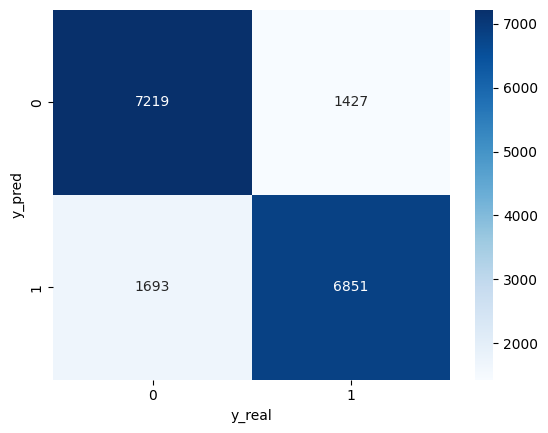

In [ ]:
ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

print(classification_report(y_test,y_predic_cat_ej1))

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues', fmt='g')
plt.show()

Pero luego, se puede observar que hay una leve bajada en las métricas.

In [ ]:
y_pred_final = model_3.predict(df_test_escalado)

830/830 [==============================] - 1s 2ms/step


In [ ]:
y_pred_final = np.where(y_pred_final>0.5,1,0)
y_pred_final = y_pred_final.ravel()
y_pred_final

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
ds_resultados=pd.DataFrame(zip(df_id['id'],y_pred_final),columns=['id','is_canceled'])
ds_resultados.head(5)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
ds_resultados.shape

(26535, 2)

In [ ]:
ds_resultados.to_csv("red_neuronal_model3.csv", index = False)

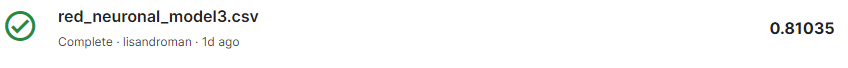

#### Cuarta Arquitectura: dos capas con la misma cantidad de neuronas que las variables de entrada

In [ ]:
cant_clases = 1

d_in=len(x_train_escalado.columns)

model_4 = keras.Sequential([
    keras.layers.Dense(d_in,input_shape=(d_in,),activation ='relu'), #capa oculta nro1 con 64 neuronas y activacion ReLu, capa de entrada
    keras.layers.Dense(d_in,activation ='relu'), #capa oculta nro2 con 64 neuronas y activacion ReLu, capa intermedia
    keras.layers.Dropout(0.2), #regularizacion
    keras.layers.Dense(cant_clases, activation='sigmoid') #capa de salida con activacion sigmoidea para problemas de clasificacion binaria
])

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 45)                2070      
                                                                 
 dense_10 (Dense)            (None, 45)                2070      
                                                                 
 dropout_3 (Dropout)         (None, 45)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 46        
                                                                 
Total params: 4,186
Trainable params: 4,186
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo, con 100 epocas y 50 batch_size.

In [ ]:
model_4.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
  loss='binary_crossentropy',
  metrics=['AUC'] # metricas para ir calculando en cada iteracion o batch
)

cant_epochs_hotel=100
historial = model_4.fit(x_train_escalado,y_train,
                      epochs=cant_epochs_hotel,
                      batch_size=50,verbose=False)

Vemos cómo el modelo va aprendiendo según la cantidad de épocas.

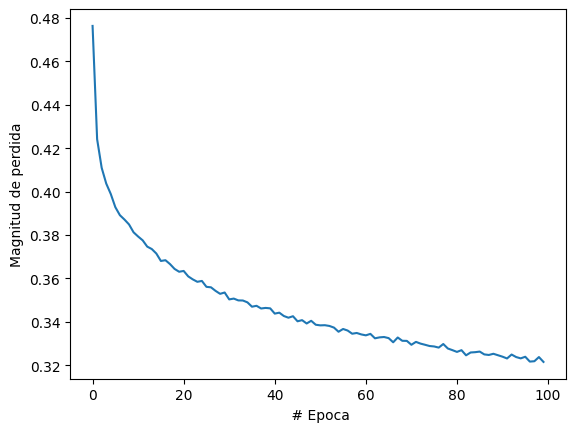

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel(" # Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [ ]:
y_pred = model_4.predict(x_test_escalado) #y_pred es un conjunto de probabilidades, a partir de esto, clasificamos las probailidades

y_predic_cat_ej1 = np.where(y_pred>0.5,1,0)

y_predic_cat_ej1

538/538 [==============================] - 1s 2ms/step


array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      8646
           1       0.82      0.82      0.82      8544

    accuracy                           0.82     17190
   macro avg       0.82      0.82      0.82     17190
weighted avg       0.82      0.82      0.82     17190



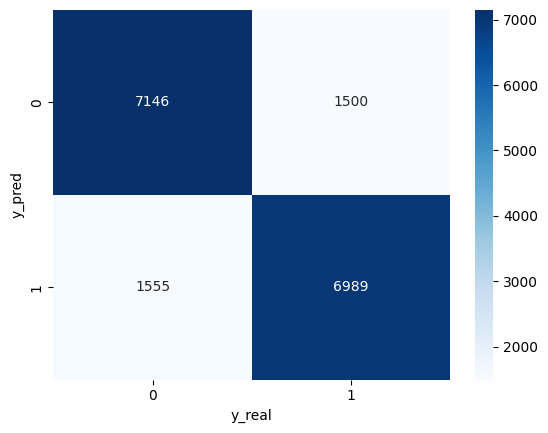

In [ ]:
ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

print(classification_report(y_test,y_predic_cat_ej1))

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues', fmt='g')
plt.show()

In [ ]:
y_pred_final = model_4.predict(df_test_escalado)

830/830 [==============================] - 1s 1ms/step


In [ ]:
y_pred_final = np.where(y_pred_final>0.5,1,0)
y_pred_final = y_pred_final.ravel()
y_pred_final

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
ds_resultados=pd.DataFrame(zip(df_id['id'],y_pred_final),columns=['id','is_canceled'])
ds_resultados.head(5)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,0
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
ds_resultados.shape

(26535, 2)

In [ ]:
ds_resultados.to_csv("red_neuronal_4.csv", index = False)

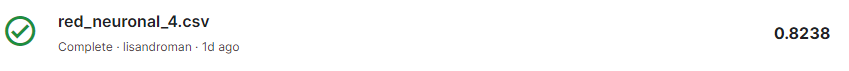

#Modelo robusto

##Creación del Modelo

Vamos a definir un modelo en base al mejor obtenido anteriormente, y luego se realizara validación cruzada para mejorar los hiperparámetros. Se eligió la cuarta arquitectura por su rendimiento.

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
d_in=len(x_train_escalado.columns)
cant_clases = 1

def create_model():
    modelo= keras.Sequential([
    keras.layers.Dense(d_in,input_shape=(d_in,), activation='relu'),
    keras.layers.Dense(d_in, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(cant_clases, activation='sigmoid')])

    modelo.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
        loss='binary_crossentropy',
        metrics=["accuracy"]
    )

    return modelo

param_dist = {
    'batch_size': [30, 50, 100, 150],
    'epochs': [50, 100, 150, 200, 250],
}

In [ ]:
modelo_cv = KerasClassifier(build_fn=create_model)

##Mejora de hiperparámetros

In [ ]:
random_search = RandomizedSearchCV(modelo_cv, param_distributions=param_dist, n_iter=20, cv=10, random_state=5)

In [ ]:
random_search.fit(x_test_escalado, y_test)

Streaming output truncated to the last 5000 lines.
104/104 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8519
Epoch 107/250
104/104 [==============================] - 0s 3ms/step - loss: 0.3132 - accuracy: 0.8521
Epoch 108/250
104/104 [==============================] - 0s 3ms/step - loss: 0.3099 - accuracy: 0.8559
Epoch 109/250
104/104 [==============================] - 0s 3ms/step - loss: 0.3121 - accuracy: 0.8522
Epoch 110/250
104/104 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.8533
Epoch 111/250
104/104 [==============================] - 0s 3ms/step - loss: 0.3125 - accuracy: 0.8537
Epoch 112/250
104/104 [==============================] - 0s 4ms/step - loss: 0.3099 - accuracy: 0.8523
Epoch 113/250
104/104 [==============================] - 0s 3ms/step - loss: 0.3103 - accuracy: 0.8546
Epoch 114/250
104/104 [==============================] - 0s 4ms/step - loss: 0.3101 - accuracy: 0.8528
Epoch 115/250
104/104 [=============

RandomizedSearchCV(cv=10,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f5f4e745960>,
                   n_iter=20,
                   param_distributions={'batch_size': [30, 50, 100, 150],
                                        'epochs': [50, 100, 150, 200, 250]},
                   random_state=5)

In [ ]:
print(str(random_search.best_params_))
print(str(random_search.best_score_))

{'epochs': 100, 'batch_size': 150}
0.8059918522834778


In [ ]:
modelo_cv.fit(x_train_escalado,y_train,
              epochs=random_search.best_params_['epochs'],
              batch_size=random_search.best_params_['batch_size'],
              verbose=False)

In [ ]:
y_pred = modelo_cv.predict(x_test_escalado) #y_pred es un conjunto de probabilidades, a partir de esto, clasificamos las probailidades

y_predic_cat_ej1 = np.where(y_pred>0.5,1,0)

y_predic_cat_ej1

538/538 [==============================] - 1s 2ms/step


array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      8646
           1       0.85      0.77      0.81      8544

    accuracy                           0.82     17190
   macro avg       0.82      0.82      0.82     17190
weighted avg       0.82      0.82      0.82     17190



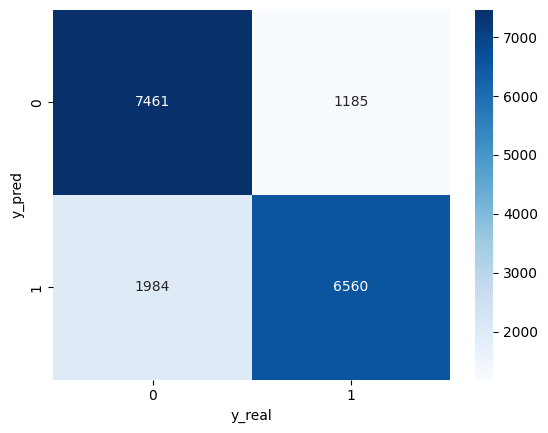

In [ ]:
ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

print(classification_report(y_test,y_predic_cat_ej1))

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues', fmt='g')
plt.show()

In [ ]:
y_pred_final = modelo_cv.predict(df_test_escalado)

830/830 [==============================] - 2s 2ms/step


In [ ]:
y_pred_final = np.where(y_pred_final>0.5,1,0)
y_pred_final = y_pred_final.ravel()
y_pred_final

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
ds_resultados=pd.DataFrame(zip(df_id['id'],y_pred_final),columns=['id','is_canceled'])
ds_resultados.head(5)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,0
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
ds_resultados.shape

(26535, 2)

In [ ]:
ds_resultados.to_csv("red_neuronal_final.csv", index = False)

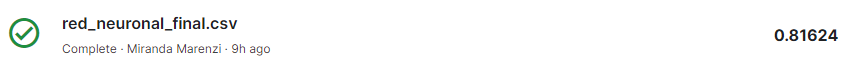

#Conclusión

Realizamos varios modelos de redes, pasando por modelos piramidales, modelos con misma cantidad de neuronas por capa, y variando la cantidad de capas. Como resultado obtuvimos una predicción eficiente, pero no fue la mejor.  En base a lo estudiado, las redes neuronales requieren de grandes conjuntos de datos para entrenarse de forma correcta, además de que tienen mucha sensibilidad a hiper-parámetros que deben ajustarse adecuadamente y esto puede ser una tarea complicada y costosa que podemos dejársela a cargo a los expertos en la materia. También, las redes neuronales pueden ser propensas al sobreajuste con datos pequeños, esto lo hemos visto en la práctica ya que en varios de nuestros modelos a pesar de usar regularizadores, con nuestro conjunto de entrenamiento obtuvimos un score que luego en Kaggle bajaba.